In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_csv("./data/terrain.csv")

In [6]:
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


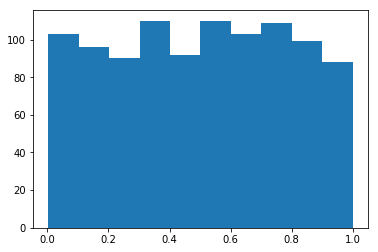

In [7]:
plt.hist(df["grade"])
plt.show()

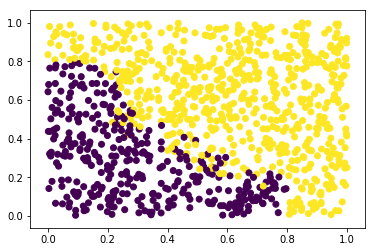

In [5]:
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])

In [8]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [10]:
X[:5]

array([[ 0.6394268 ,  0.09935462],
       [ 0.02501076,  0.68568027],
       [ 0.27502932,  0.54446586],
       [ 0.22321074,  0.97784253],
       [ 0.73647121,  0.35867384]])

In [11]:
y[:5]

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: target, dtype: float64

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=70)

In [16]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='uniform')

In [17]:
clf.predict([[0.5,0.5]])

array([ 1.])

In [12]:
# We can make a 2d representation
# For this we create a mesh and we predict for each point in the mesh

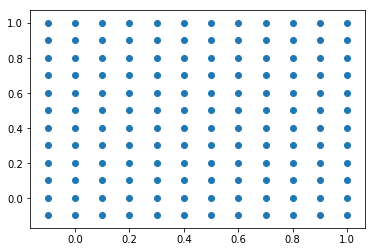

In [18]:
h = .1
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
plt.scatter(xx,yy)

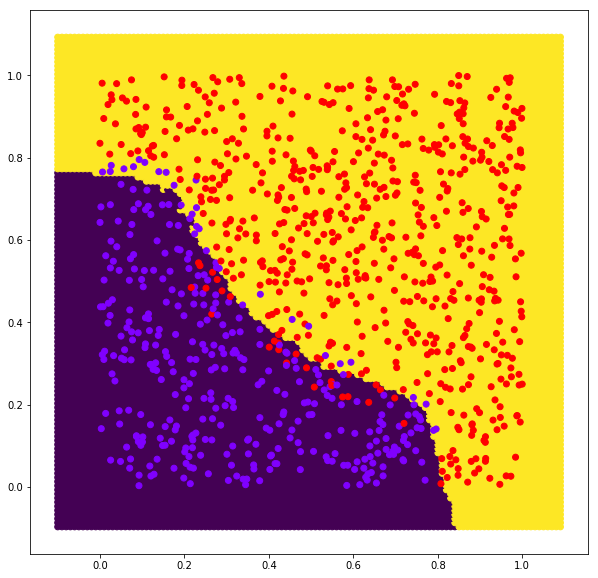

In [19]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx,yy,c=Z)
plt.scatter(df["bumpiness"],df["grade"],c=df["target"],cmap="rainbow")

In [19]:
h = .05
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


In [ ]:
# And now we reduce the size of the grid for higher resolution

In [ ]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



In [ ]:
## Check out the overfitting !!

In [59]:
#Aquí hacemos código de testeo. copiamos las dos líneas que hay acontinuación de una 
#búsqueda de "train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [60]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.95151515151515154

In [62]:
# Crossval score.
#con esto tanteamos el mejor porcentaje de testeo/entrenamiento.

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,cv=10))

0.94296669666966704

In [63]:
# Grid Search
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [78]:
clf=GridSearchCV(KNeighborsClassifier(),param_grid={"n_neighbors":range(1,40)},scoring="accuracy")

In [79]:
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [80]:
clf.best_params_

{'n_neighbors': 8}

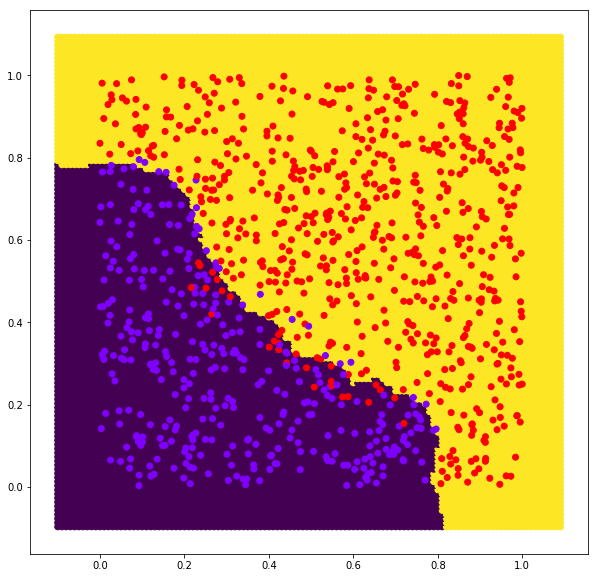

In [68]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx, yy,c=Z)
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
plt.show()